# RF from Scratch!

#### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

#### Load data

In [3]:
PATH = "dcata/bulldozers/"

df_raw = pd.read_feather('tmp/bulldozers-raw')
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

In [4]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [5]:
# two cols to start simply
x_sub = X_train[['YearMade', 'MachineHoursCurrentMeter']]

#### Basic RF Data Structures
- top down approach

In [34]:
class TreeEnsemble():
    def __init__(self,x,y,n_trees,sample_sz,min_leaf=5):
        np.random.seed(42) # for testing purposes
        self.x,self.y,self.sample_sz,self.min_leaf = x,y,sample_sz,min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]
        
    def create_tree(self):
        '''
        Construct a Decision tree from a random sample of the data
        '''
        rndm_idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        return DecisionTree(self.x.iloc[rndm_idxs], self.y[rndm_idxs],
                           idxs=np.array(range(self.sample_sz)), min_leaf=self.min_leaf)
        
    def predict(self,x):
        '''
        The tree ensemble predict function calls each tree's predict function
        (not recursive)
        '''
        return np.mean([t.predict(x) for t in self.trees],axis=0)
    

In [35]:
class DecisionTree():
    def __init__(self,x,y,idxs,min_leaf=5):
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
#         self.rows,self.cols = len(idxs), x.shape[1]
#         self.value = np.mean(y[idxs])
#         self.score = float('inf')
#         self.find_varsplit()
        

In [37]:
# instantiate a TreeEnsemble
m = TreeEnsemble(X_train, y_train, n_trees=10, sample_sz=1000, min_leaf=3)

In [39]:
preds = m.predict(X_valid)

AttributeError: 'DecisionTree' object has no attribute 'predict'

### Quick primer on np.random.permutation


In [8]:
?np.random.permutation

Docstring:
permutation(x)

Randomly permute a sequence, or return a permuted range.

If `x` is a multi-dimensional array, it is only shuffled along its
first index.

.. note::
    New code should use the ``permutation`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Parameters
----------
x : int or array_like
    If `x` is an integer, randomly permute ``np.arange(x)``.
    If `x` is an array, make a copy and shuffle the elements
    randomly.

Returns
-------
out : ndarray
    Permuted sequence or array range.

See Also
--------
Generator.permutation: which should be used for new code.

Examples
--------
>>> np.random.permutation(10)
array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6]) # random

>>> np.random.permutation([1, 4, 9, 12, 15])
array([15,  1,  9,  4, 12]) # random

>>> arr = np.arange(9).reshape((3, 3))
>>> np.random.permutation(arr)
array([[6, 7, 8], # random
       [0, 1, 2],
       [3, 4, 5]])
Type:      builtin_function_or_method


In [9]:
a = [1,2,3,4,5]
sample_sz = 3
np.random.permutation(len(a))[:sample_sz]

array([1, 3, 4])

In [15]:
b = np.array([3])

In [11]:
np.array(range(3))

array([0, 1, 2])

In [17]:
b.shape

(1,)

### Creating a random dataset

In [42]:
x = np.linspace(0,1)
y = x + np.random.uniform(-0.2,0.2,x.shape)
x.shape # tuple with 1 thing in it

(50,)

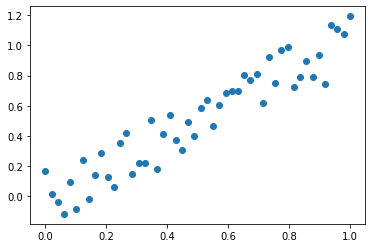

In [43]:
plt.scatter(x,y)